# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as skl

1. Clean the data and perform some EDA and visualization to get to know the data set.

In [3]:
# Cleaning
pierce_df = pd.read_csv('./data/pierce_county_house_sales.csv')

for col in pierce_df.columns:
    print(col, ": ", sum(pierce_df[col].isna()))

print('\n')

print(pierce_df.dtypes, '\n')

pierce_df = pierce_df.dropna(subset = ['hvac_description', 'exterior', 'interior', 'roof_cover'])
pierce_df['waterfront_type'] = pierce_df['waterfront_type'].fillna('Missing')
pierce_df['view_quality'] = pierce_df['view_quality'].fillna('Missing')

for col in pierce_df.columns:
    print(col, ": ", sum(pierce_df[col].isna()))

print("\npierce df is now cleaned of null values!")



sale_date :  0
sale_price :  0
house_square_feet :  0
attic_finished_square_feet :  0
basement_square_feet :  0
attached_garage_square_feet :  0
detached_garage_square_feet :  0
fireplaces :  0
hvac_description :  7
exterior :  1
interior :  7
stories :  0
roof_cover :  8
year_built :  0
bedrooms :  0
bathrooms :  0
waterfront_type :  16261
view_quality :  15895
utility_sewer :  0


sale_date                      object
sale_price                      int64
house_square_feet               int64
attic_finished_square_feet      int64
basement_square_feet            int64
attached_garage_square_feet     int64
detached_garage_square_feet     int64
fireplaces                      int64
hvac_description               object
exterior                       object
interior                       object
stories                         int64
roof_cover                     object
year_built                      int64
bedrooms                        int64
bathrooms                       int64
waterf

Categorical columns to encode:
 Index(['sale_date', 'hvac_description', 'exterior', 'interior', 'roof_cover',
       'waterfront_type', 'view_quality', 'utility_sewer'],
      dtype='object')
sale_date 362 unique values
hvac_description 9 unique values
exterior 16 unique values
interior 2 unique values
roof_cover 6 unique values
waterfront_type 5 unique values
view_quality 9 unique values
utility_sewer 5 unique values
Index(['sale_price', 'house_square_feet', 'attic_finished_square_feet',
       'basement_square_feet', 'attached_garage_square_feet',
       'detached_garage_square_feet', 'fireplaces', 'stories', 'year_built',
       'bedrooms', 'bathrooms'],
      dtype='object')


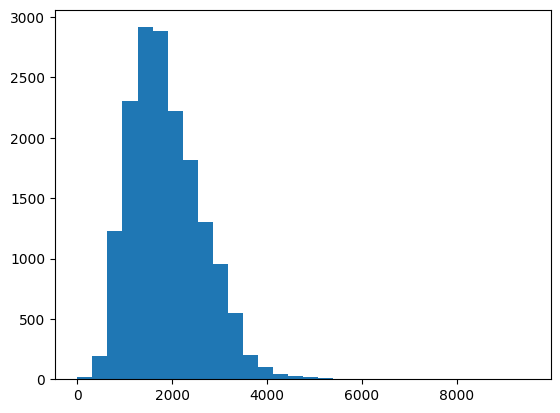

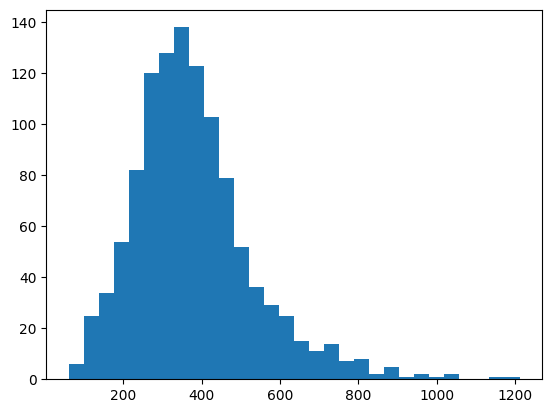

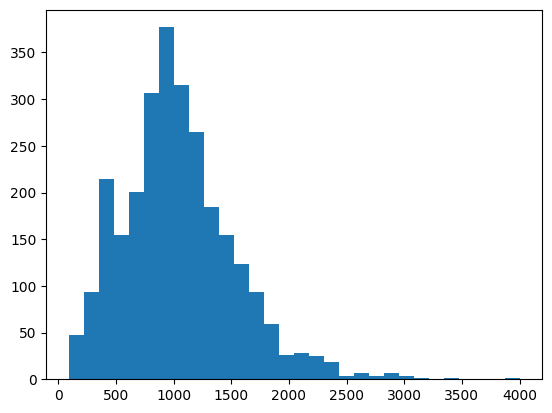

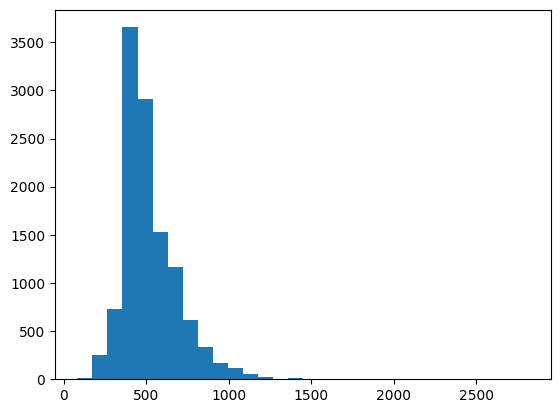

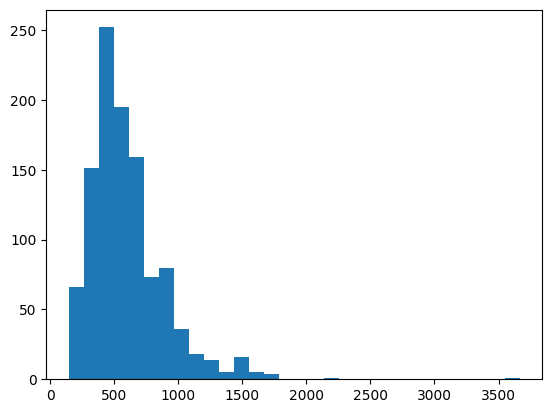

In [4]:
# EDA
object_cols = pierce_df.select_dtypes(include='object').columns
print("Categorical columns to encode:\n", object_cols)

for col in object_cols:
    print(col, pierce_df[col].nunique(), "unique values")

lin_model_pierce_df = pierce_df.drop(columns=['sale_date'])


# corr = pierce_df.corr(numeric_only=True)
# plt.figure(figsize=(12, 10))
# sns.heatmap(corr, cmap='coolwarm', annot=False)
# plt.title('Feature Correlation')
# plt.show()

# pierce_df.hist(figsize=(15, 10), bins=30)
# plt.tight_layout()
# plt.show()

# plt.scatter(pierce_df['year_built'], pierce_df['sale_price'])
# plt.show()

print(pierce_df.select_dtypes(include='int64').columns)

# without 0's because some don't have the features so it defaults to 0
for all in ['house_square_feet', 'attic_finished_square_feet', 'basement_square_feet', 'attached_garage_square_feet', 'detached_garage_square_feet']:
    pierce_df[all] = pd.to_numeric(pierce_df[all], errors='coerce')
    non_zero_values = pierce_df[pierce_df[all] > 0][all]
    plt.hist(non_zero_values, bins=30)
    plt.show()
# not largely skewed, i think im good to linear model

2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.


In [5]:
lin_df = pd.get_dummies(lin_model_pierce_df, columns=['hvac_description', 'exterior', 'interior', 'roof_cover', 'waterfront_type', 'view_quality', 'utility_sewer'], drop_first=True)
lin_df['sale_price'] = np.log(lin_df['sale_price'])

# can scale variables numeric later

3. Implement an ~80 / ~20 train-test split. Put the test data aside.


In [6]:
from sklearn.model_selection import train_test_split

X = lin_df.drop(columns = 'sale_price')
y = lin_df['sale_price']

X.insert(0, 'Intercept', 1.0)
X_matrix = X.values.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_np = X_train.astype(float).to_numpy()
X_test_np = X_test.astype(float).to_numpy()
y_train_np = y_train.astype(float).to_numpy()
y_test_np = y_test.astype(float).to_numpy()

4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?


In [7]:
beta = np.linalg.inv(X_train_np.T @ X_train_np) @ X_train_np.T @ y_train_np
y_pred_train = X_train_np @ beta
y_pred_test = X_test_np @ beta

coefficients = pd.Series(beta, index=X.columns)

# errors and R^2:
ss_res_train = np.sum((y_train_np - y_pred_train) ** 2)
ss_tot_train = np.sum((y_train_np - np.mean(y_train_np)) ** 2)
r_squared_train = 1 - (ss_res_train / ss_tot_train)
rmse_train = np.sqrt(np.mean((y_train_np - y_pred_train) ** 2))

print("RMSE on train:", rmse_train)
print("R^2 on train:", r_squared_train)

ss_res_test = np.sum((y_test_np - y_pred_test) ** 2)
ss_tot_test = np.sum((y_test_np - np.mean(y_test_np)) ** 2)
r_squared_test = 1 - (ss_res_test / ss_tot_test)
rmse_test = np.sqrt(np.mean((y_test_np - y_pred_test) ** 2))

print("RMSE on test:", rmse_test)
print("R^2 on test:", r_squared_test)

RMSE on train: 0.2987222902246231
R^2 on train: 0.49971860427963366
RMSE on test: 0.3251135158919476
R^2 on test: 0.4534680861783561


It appears that the model on the training set performs better as there's less of an error than that of the testing set. However, it appears tat the training set model explains around 50% of the variance whereas the testing set model explains around less with 45% of the variance. So while teh errors are slightly similar with one being better than the other, both appear to operate similarly, but with the training set model performing slightly better.

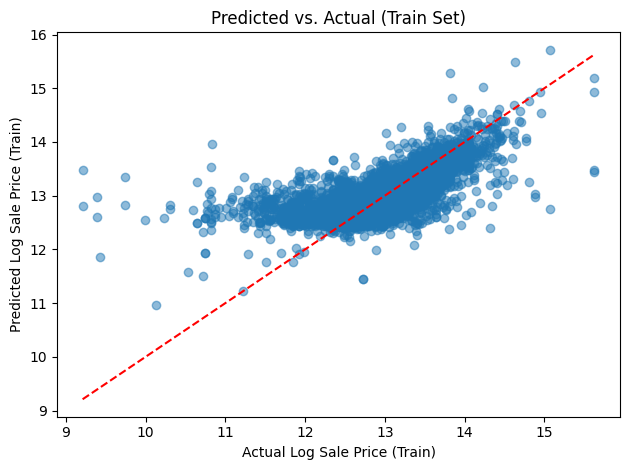

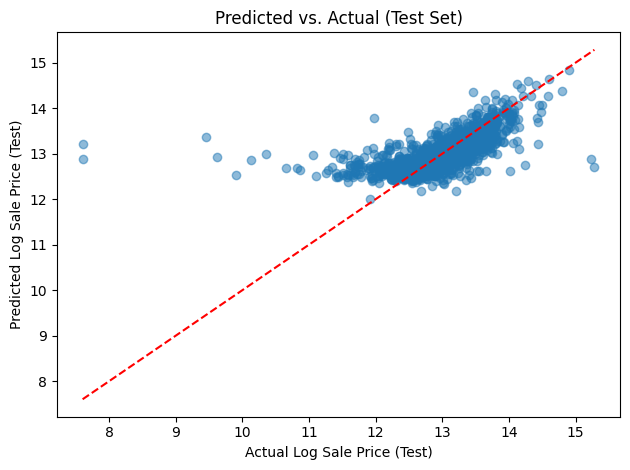

In [8]:
import matplotlib.pyplot as plt

plt.scatter(y_train_np, y_pred_train, alpha=0.5)
plt.xlabel("Actual Log Sale Price (Train)")
plt.ylabel("Predicted Log Sale Price (Train)")
plt.title("Predicted vs. Actual (Train Set)")
plt.plot([y_train_np.min(), y_train_np.max()], [y_train_np.min(), y_train_np.max()], 'r--')  # identity line
plt.tight_layout()
plt.show()

plt.scatter(y_test_np, y_pred_test, alpha=0.5)
plt.xlabel("Actual Log Sale Price (Test)")
plt.ylabel("Predicted Log Sale Price (Test)")
plt.title("Predicted vs. Actual (Test Set)")
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--')  # identity line
plt.tight_layout()
plt.show()


5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities? 


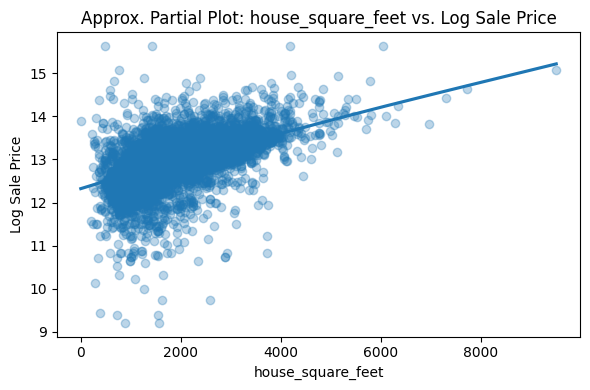

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


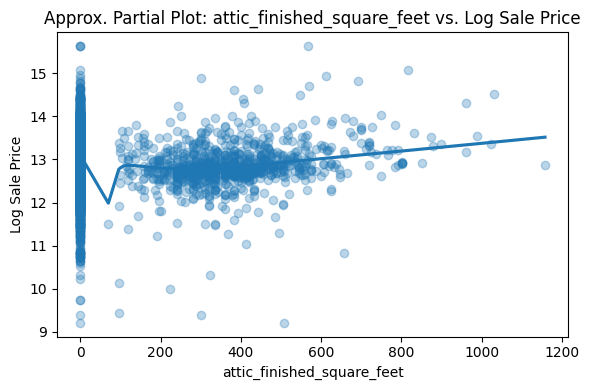

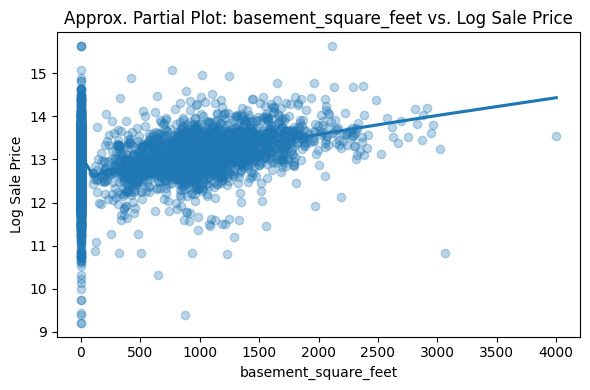

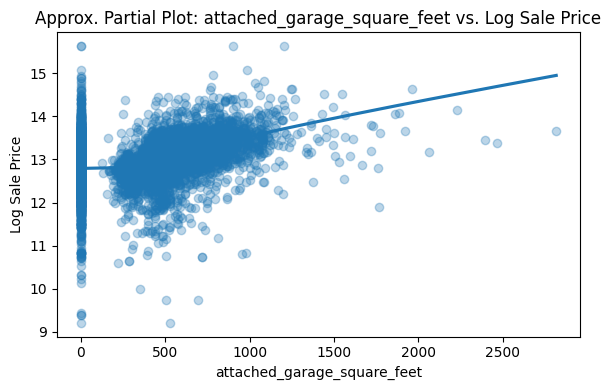

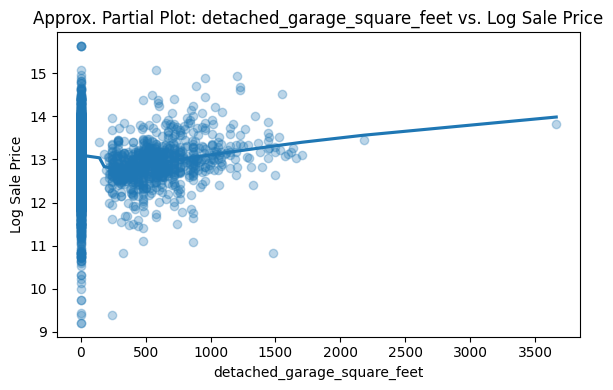

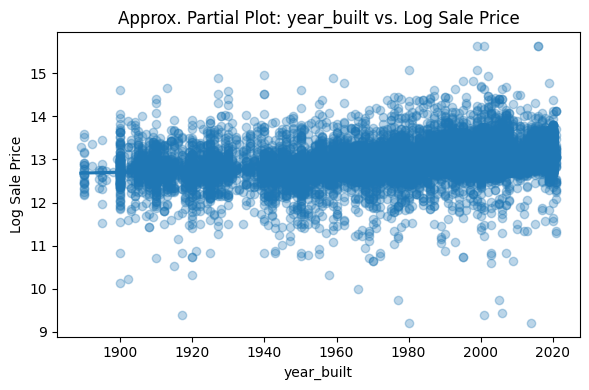

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric variables only
numeric_cols = X_train.select_dtypes(include='number').columns
numeric_cols = ['house_square_feet', 'attic_finished_square_feet', 'basement_square_feet', 'attached_garage_square_feet', 'detached_garage_square_feet', 'year_built']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=X_train[col], y=y_train, lowess=True, scatter_kws={'alpha':0.3})
    plt.title(f"Approx. Partial Plot: {col} vs. Log Sale Price")
    plt.xlabel(col)
    plt.ylabel("Log Sale Price")
    plt.tight_layout()
    plt.show()

NOTE: I only did partial plots for true numerical and continuous variables as some int types that were technically numerics resulted in discrete looking plots (probably because their unique values are discrete in a sense).

For the partial plots above, I say that variables like basement_square_feet, attic_finished_square_feet, and house_square_feet display good to great linearities, while variables like year_built, detached_garage_square_feet, and attached_garage_square_feet display weak or flat linearities. 

One that has significant non-linearity would be year_built, as the line is almost flat with a derivative of 0 and the points are very noisy, ranging from as low as 9 log price to above 15 log price. This remains consistent over time.

6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?


In [20]:
X_transformed = X.copy()

X_transformed['log_house_sqft'] = np.log(X_transformed['house_square_feet'] + 1)
X_transformed['attached_garage_squared'] = X_transformed['attached_garage_square_feet'] ** 2

X_transformed['sqft_x_bedrooms'] = X_transformed['house_square_feet'] * X_transformed['bedrooms']

# X_transformed['has_detached_garage'] = (X_transformed['detached_garage_square_feet'] > 0).astype(int)



X = lin_df.drop(columns = 'sale_price')
y = lin_df['sale_price']

X.insert(0, 'Intercept', 1.0)
X_matrix = X.values.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

X_train_np = X_train.astype(float).to_numpy()
X_test_np = X_test.astype(float).to_numpy()
y_train_np = y_train.astype(float).to_numpy()
y_test_np = y_test.astype(float).to_numpy()



beta = np.linalg.inv(X_train_np.T @ X_train_np) @ X_train_np.T @ y_train_np
y_pred_train = X_train_np @ beta
y_pred_test = X_test_np @ beta

coefficients = pd.Series(beta, index=X_transformed.columns)

# errors and R^2:
ss_res_train = np.sum((y_train_np - y_pred_train) ** 2)
ss_tot_train = np.sum((y_train_np - np.mean(y_train_np)) ** 2)
r_squared_train = 1 - (ss_res_train / ss_tot_train)
rmse_train = np.sqrt(np.mean((y_train_np - y_pred_train) ** 2))

print("RMSE on train:", rmse_train)
print("R^2 on train:", r_squared_train)

ss_res_test = np.sum((y_test_np - y_pred_test) ** 2)
ss_tot_test = np.sum((y_test_np - np.mean(y_test_np)) ** 2)
r_squared_test = 1 - (ss_res_test / ss_tot_test)
rmse_test = np.sqrt(np.mean((y_test_np - y_pred_test) ** 2))

print("RMSE on test:", rmse_test)
print("R^2 on test:", r_squared_test)

RMSE on train: 0.2980439032597156
R^2 on train: 0.5019882642563145
RMSE on test: 0.32534068738294425
R^2 on test: 0.45270404629361216


After doing some transofmrations (log of house squared feet, squaring garage attached square feet, and house squared feet x bedrooms), it appears the RMSE and R^2 didn't change greatly for the training or testing data. The testing still captures around 45% of the variance and the training still captures around 50% (now slightly more) of the variance. Both kept the relatively same RMSE. I could probably do more transformations and interactions, but it appears it would slightly increase or decrease the R^2. I know this because I tried a couple other transformations before the final ones above, which didn't result in any great change of values.

I will say, if I reach a certain great number of transformations or interactions, the model may begin to greatly overfit. We see this with that increasing variance capture of RMSE, but for now, with the limited variables I have, it might not reach that point.

7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?


I cleaned data initially by dropping columns that weren't useful and doing one-hot-encoding for categorical variables. That model explained around 50% of the variance in the training set and 45% in the test set in R^2, with similar RMSE values of 0.29.. and 0.30.., so I was confident that it wasn’t overfitting and was doing a good job generalizing to unseen data.

I then looked at partial plots for the actual numeric variables. Variables like basement_square_feet, attic_finished_square_feet, and house_square_feet display good to great linearities, while variables like year_built, detached_garage_square_feet, and attached_garage_square_feet display weak or flat linearities.

I tested out a few transformations and interactions (logging square footage, squaring garage space, and creating a bedroom x size interaction). The interactions and transformations didn’t drastically change the model's performance since R² and RMSE stayed pretty close to the original. This makes sense since I didn’t introduce majorly new information, just tweaked how it was represented. Had I introduced several more transformations compared to number of variables, there most likely would've been an overfit displayed through the R^2 and RMSE.

Overall, I didn’t see signs of overfitting, but I also didn’t get huge optimality, which says to me that there’s a good balance. Adding complexity doesn’t always help in this model situation. Had I kept continued adding transformed variables, the model might eventually start to overfit. 

So, I’ve learned that model selection is really about finding the spot just right between simple and complex model, and knowing when a model is "good enough" for the data you have based on tells like the R^2 or RMSE.

8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.